<font size = '6'> **Signal Class Project: Visualize "Wheezes" and "Crackles" in Respiratory Sound**</font>
----------
<font size = '3'>Database: Respiratory Sound Database, kaggle 
To get the database (cmd): kaggle datasets download -d vbookshelf/respiratory-sound-database
<br>Maintainer: @wachiii_raya <- always tried n sleepless guy lol

<font size = '5'> ***.wav and .file in Folder*** </font>



In [24]:
import numpy as np
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import pandas as pd
import os
import csv

In [10]:
audioFilePaths = []
recordingInfoFilePaths = []
audioTextFilePath = "audio_and_txt_files"
for dirname, _, filenames in os.walk(audioTextFilePath):
    for filename in filenames:                          # Loop through all files in the directory 
        fullPath = os.path.join(dirname, filename)      # Get full path of file, .join() method combines paths
        if filename.endswith("wav"):
            audioFilePaths.append(fullPath)
        elif filename.endswith("txt"):
            recordingInfoFilePaths.append(fullPath) 
        #print(os.path.join(dirname, filename))
        
print(len(audioFilePaths))
print(len(recordingInfoFilePaths))

920
920


In [11]:
def extractFilenameWithoutExtension(fullPath: str):
    ''' Extracts the filename without the extension from a full path, 
        returns a string which is the filename without the extension '''
    fileName = os.path.basename(fullPath)
    fileNameWithoutPath = os.path.splitext(fileName)[0]
    return fileNameWithoutPath

def getFileInfoDict(pathList: list):
    ''' Returns a dictionary of the recording info for each file in the pathList '''
    fileInfoDict = {}
    for path in pathList:
        fileNameWithoutPath = extractFilenameWithoutExtension(path) 
        infoList = []
        with open(path, 'r') as hFile:
            reader = csv.reader(hFile, delimiter='\t')
            for row in reader:
                startTime = float(row[0])
                endTime = float(row[1])
                hasCrackles = True if int(row[2]) == 1 else False
                hasWheezes = True if int(row[3]) == 1 else False
                infoList.append((startTime, endTime, hasCrackles, hasWheezes))
                
        fileInfoDict[fileNameWithoutPath] = infoList
    return fileInfoDict

In [12]:
audioFilePathsWithoutExtension = [extractFilenameWithoutExtension(path) for path in audioFilePaths]
fileInfoDict = getFileInfoDict(recordingInfoFilePaths)
fileInfolist = [fileInfoDict[audioPath] for audioPath in audioFilePathsWithoutExtension]    # List order is the same as audioFilePaths

#print(fileInfoDict)
#print(fileInfolist)

<font size = '5'> ***Catagorize Data*** </font>
<br><font size = '3'> : Catagorize the file into 4 lists are cracklesAndWheezes, cracklesOnly, wheezesOnly, noCracklesNoWheezes</font>

<br><font size = '3'> *Notes: dict<filename:string, (start, end, hasCrackles, hasWheezes)>* </font> </br>


In [18]:
# scan all, which file have both crackles and wheezes
# crackles and wheezes
cracklesAndWheezes = []
cracklesOnly = []
wheezesOnly = []
noCracklesNoWheezes = []

for i in range(len(fileInfolist)):
    hasCrackles = False
    hasWheezes = False
    for j in range(len(fileInfolist[i])):
        if fileInfolist[i][j][2]:
            hasCrackles = True
        if fileInfolist[i][j][3]:
            hasWheezes = True
    if hasCrackles and hasWheezes:
        cracklesAndWheezes.append(audioFilePaths[i])
    elif hasCrackles:
        cracklesOnly.append(audioFilePaths[i])
    elif hasWheezes:
        wheezesOnly.append(audioFilePaths[i])
    else:
        noCracklesNoWheezes.append(audioFilePaths[i])

print("crackles and wheezes: ", len(cracklesAndWheezes))
print("crackles only: ", len(cracklesOnly))
print("wheezes only: ", len(wheezesOnly))
print("no crackles no wheezes: ", len(noCracklesNoWheezes))

crackles and wheezes:  202
crackles only:  297
wheezes only:  134
no crackles no wheezes:  287


<font size = '6'> ***Visualize: Wheezes Only*** </font>
<br><font size = '3'>: just pick one of them :))

**1. Time Domain**

In [115]:
# to see label
fileInfoDict['118_1b1_Al_sc_Litt3200']

[(0.0, 0.93331, False, False),
 (0.93331, 2.1062, False, True),
 (2.1062, 3.3739, False, True),
 (3.3739, 4.447, False, True),
 (4.447, 5.5599, False, True),
 (5.5599, 6.7528, False, True),
 (6.7528, 7.9456, False, True),
 (7.9456, 9.0686, False, True),
 (9.0686, 15.472, False, False)]

[(0.0, 0.93331, False, False), (0.93331, 2.1062, False, True), (2.1062, 3.3739, False, True), (3.3739, 4.447, False, True), (4.447, 5.5599, False, True), (5.5599, 6.7528, False, True), (6.7528, 7.9456, False, True), (7.9456, 9.0686, False, True), (9.0686, 15.472, False, False)]


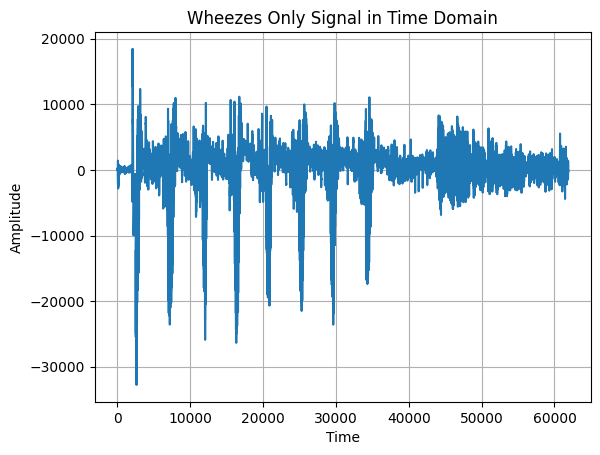

In [65]:
# print(wheezesOnly[9])
wheezesOnlyPath = wheezesOnly[9]
print(fileInfoDict['118_1b1_Al_sc_Litt3200'])

wheezesOnlySignal = read(wheezesOnlyPath)

plt.plot(wheezesOnlySignal[1])
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Wheezes Only Signal in Time Domain")
plt.grid(True)
plt.show()

**2. Frequency Domain**

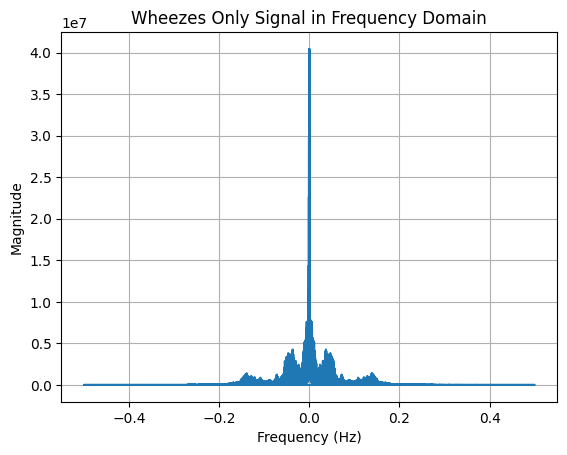

In [63]:
# visualize in frequency domain
fftWheezesOnly = np.fft.fft(wheezesOnlySignal[1])       # Tong pen np.array naja
fftCracksOnly = np.abs(fftCracksOnly)                 # convert to absolute values, because the values are complex numbers

# Generate frequencies
frequencies = np.fft.fftfreq(len(fftCracksOnly))

plt.plot(frequencies, fftCracksOnly)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Wheezes Only Signal in Frequency Domain')
plt.grid(True)
plt.show()

**3. Spectogram**

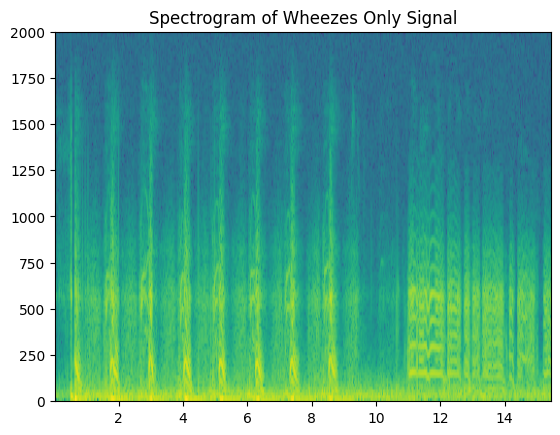

In [67]:
#plot spectrogram, wheezes only
plt.specgram(wheezesOnlySignal[1], Fs=wheezesOnlySignal[0])

plt.title('Spectrogram of Wheezes Only Signal')
plt.show()


<font size = '6'> ***Visualize: Crackles Only*** </font>
<br><font size = '3'>: just pick one of them as well:))

**1. Time Domain**

In [109]:
# fileInfoDict['107_3p2_Ll_mc_AKGC417L']
# print(cracklesOnly[15])

[(0.804, 3.256, True, False),
 (3.256, 5.566, True, False),
 (5.566, 7.851, True, False),
 (7.851, 10.054, True, False),
 (10.054, 12.066, True, False),
 (12.066, 14.47, True, False),
 (14.47, 16.696, True, False),
 (16.696, 18.887, True, False),
 (18.887, 19.792, True, False)]

[(0.804, 3.256, True, False), (3.256, 5.566, True, False), (5.566, 7.851, True, False), (7.851, 10.054, True, False), (10.054, 12.066, True, False), (12.066, 14.47, True, False), (14.47, 16.696, True, False), (16.696, 18.887, True, False), (18.887, 19.792, True, False)]


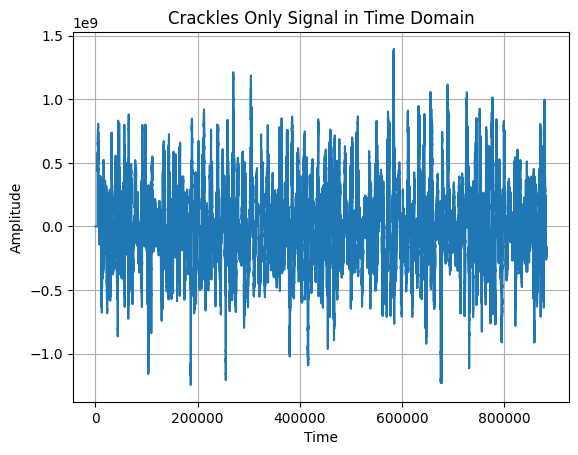

In [111]:
cracklesOnlyPath = cracklesOnly[15]
cracklesOnlySignal = read(cracklesOnlyPath)
print(fileInfoDict['107_3p2_Ll_mc_AKGC417L'])

plt.plot(cracklesOnlySignal[1])
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Crackles Only Signal in Time Domain")
plt.grid(True)
plt.show()

**2. Frequency Domain**

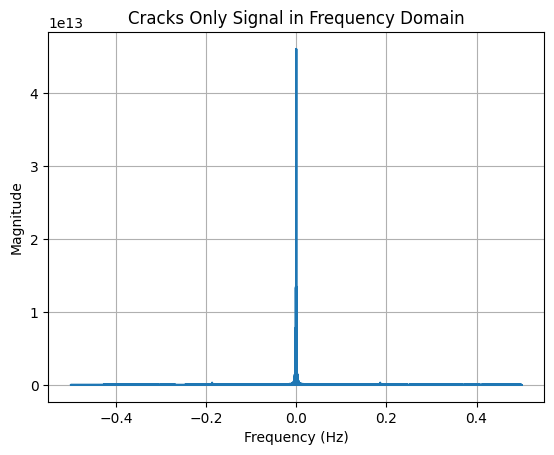

In [113]:
# visualize in frequency domain
fftCracksOnly = np.fft.fft(cracklesOnlySignal[1])       # Tong pen np.array naja
fftCracksOnly = np.abs(fftCracksOnly)                 # convert to absolute values, because the values are complex numbers

# Generate frequencies
frequencies_1 = np.fft.fftfreq(len(fftCracksOnly))

plt.plot(frequencies_1, fftCracksOnly)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Cracks Only Signal in Frequency Domain')
plt.grid(True)
plt.show()

**3. Spectogram**

c:\Users\wachi\miniconda3\Lib\site-packages\matplotlib\axes\_axes.py:7944: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


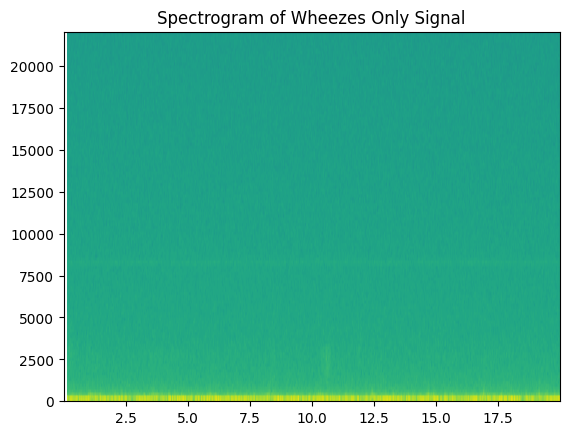

In [114]:
#plot spectrogram, wheezes only
plt.specgram(cracklesOnlySignal[1], Fs=cracklesOnlySignal[0])

plt.title('Spectrogram of Wheezes Only Signal')
plt.show()

<font size = '5'> ***Visualize: Wheezes and Crackles*** </font>


<font size = '5'> ***Visualize: No Wheezes and Crackles*** </font>
